## Notebook Imports:

In [1]:
# Array and df operations :
import pandas as pd
import numpy as np

# Visulization :
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# prprocessing :
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score

# Model Agorithm :
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

# Evaluation :
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_recall_curve, precision_score
from sklearn.metrics import precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("numerical_df.csv")
df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,1,67.0,0,1,1,1,228.69,36.600000,1,1,0,0,1,0,0
1,0,61.0,0,0,1,0,202.21,29.065758,0,1,0,0,0,1,0
2,1,80.0,0,1,1,0,105.92,32.500000,0,1,0,0,1,0,0
3,0,49.0,0,0,1,1,171.23,34.400000,2,1,0,0,1,0,0
4,0,79.0,1,0,1,0,174.12,24.000000,0,1,0,0,0,1,0


In [3]:
df["stroke"].value_counts()

0    4860
1     249
Name: stroke, dtype: int64

In [4]:
from imblearn.over_sampling import SMOTE


In [5]:
x = df.drop("stroke", axis=1)
y = df["stroke"]

smot = SMOTE(sampling_strategy=0.7)
x_sample, y_sample = smot.fit_resample(x, y)

In [7]:
y_sample.value_counts()

0    4860
1    3402
Name: stroke, dtype: int64

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x_sample, y_sample, test_size=0.2,  stratify=y_sample, random_state=40)

In [9]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)

# For Training :
y_pred_train = dt_model.predict(x_train)
conf_matrix = confusion_matrix(y_train, y_pred_train)
class_report = classification_report(y_train, y_pred_train)
print(conf_matrix)
print(class_report)

print()

# For Testing :
y_pred_test = dt_model.predict(x_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)
class_report = classification_report(y_test, y_pred_test)
print(conf_matrix)
print(class_report)

[[3888    0]
 [   0 2721]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3888
           1       1.00      1.00      1.00      2721

    accuracy                           1.00      6609
   macro avg       1.00      1.00      1.00      6609
weighted avg       1.00      1.00      1.00      6609


[[883  89]
 [ 62 619]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       972
           1       0.87      0.91      0.89       681

    accuracy                           0.91      1653
   macro avg       0.90      0.91      0.91      1653
weighted avg       0.91      0.91      0.91      1653



In [10]:
dt_model.tree_.max_depth, dt_model.tree_.node_count, dt_model.tree_.n_features

(27, 1035, 14)

In [11]:
dt_model.feature_importances_

array([0.02067467, 0.43556369, 0.01011342, 0.01083093, 0.02344822,
       0.01741876, 0.14863937, 0.11881366, 0.02172094, 0.0431502 ,
       0.00059868, 0.09543031, 0.05220316, 0.00139399])

In [12]:
pd.DataFrame(dt_model.feature_importances_, index=x_sample.columns)

,0
gender,0.020675
age,0.435564
hypertension,0.010113
heart_disease,0.010831
ever_married,0.023448
Residence_type,0.017419
avg_glucose_level,0.148639
bmi,0.118814
smoking_status,0.021721
work_type_Govt_job,0.043150


## Hyperparameter tunning :

In [18]:
estimator = DecisionTreeClassifier()
params = {"criterion":['gini', "entropy"],
         "min_samples_split":np.arange(2, 4),
         "min_samples_leaf":np.arange(2, 8),
         "max_depth":np.arange(18, 24),
         "random_state":[40, 45]}

gscv = GridSearchCV(estimator, params, cv=5)
gscv.fit(x_train, y_train)

gscv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=2,
                       random_state=40)

In [19]:
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=2,
                       random_state=40)
dt_model.fit(x_train, y_train)

# For Training :
y_pred_train = dt_model.predict(x_train)
conf_matrix = confusion_matrix(y_train, y_pred_train)
class_report = classification_report(y_train, y_pred_train)
print(conf_matrix)
print(class_report)

print()

# For Testing :
y_pred_test = dt_model.predict(x_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)
class_report = classification_report(y_test, y_pred_test)
print(conf_matrix)
print(class_report)


[[3862   26]
 [  87 2634]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3888
           1       0.99      0.97      0.98      2721

    accuracy                           0.98      6609
   macro avg       0.98      0.98      0.98      6609
weighted avg       0.98      0.98      0.98      6609


[[900  72]
 [ 82 599]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       972
           1       0.89      0.88      0.89       681

    accuracy                           0.91      1653
   macro avg       0.90      0.90      0.90      1653
weighted avg       0.91      0.91      0.91      1653



## Prunning 

In [20]:
ccp_results = dt_model.cost_complexity_pruning_path(x_train, y_train)
ccp_alpha_list = ccp_results["ccp_alphas"]

In [21]:
train_acc = []
test_acc = []
num_nodes = []
ccp_values = []

for i in ccp_alpha_list:
    clf = DecisionTreeClassifier(random_state=40, ccp_alpha=i)
    clf.fit(x_train, y_train)
    train_acc.append(clf.score(x_train, y_train))
    test_acc.append(clf.score(x_test, y_test))
    num_nodes.append(clf.tree_.node_count)

In [30]:
idx = np.where(test_acc == np.max(test_acc))
idx[0]

array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 42, 43, 45, 46, 47, 48,
       49, 50, 51, 52, 53, 54, 55, 56, 57, 58], dtype=int64)

In [31]:
for i in idx[0]:
    print(test_acc[i], train_acc[i], "-->", i)

0.9225650332728372 0.9807837796943562 --> 20
0.9225650332728372 0.9807837796943562 --> 21
0.9225650332728372 0.9807837796943562 --> 22
0.9225650332728372 0.9807837796943562 --> 23
0.9225650332728372 0.9807837796943562 --> 24
0.9225650332728372 0.9807837796943562 --> 25
0.9225650332728372 0.9807837796943562 --> 26
0.9225650332728372 0.9807837796943562 --> 27
0.9225650332728372 0.9807837796943562 --> 28
0.9225650332728372 0.9807837796943562 --> 29
0.9225650332728372 0.9807837796943562 --> 30
0.9225650332728372 0.9698895445604478 --> 42
0.9225650332728372 0.9698895445604478 --> 43
0.9225650332728372 0.9685277651687093 --> 45
0.9225650332728372 0.9685277651687093 --> 46
0.9225650332728372 0.9679225298834923 --> 47
0.9225650332728372 0.9679225298834923 --> 48
0.9225650332728372 0.9679225298834923 --> 49
0.9225650332728372 0.9679225298834923 --> 50
0.9225650332728372 0.9679225298834923 --> 51
0.9225650332728372 0.9674686034195794 --> 52
0.9225650332728372 0.9671659857769708 --> 53
0.92256503

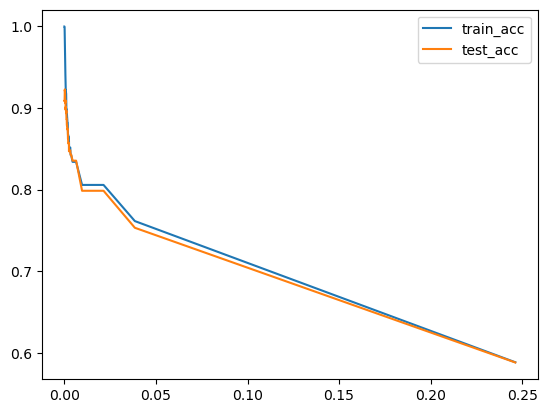

In [33]:
plt.plot(ccp_alpha_list, train_acc, label="train_acc")
plt.plot(ccp_alpha_list, test_acc, label="test_acc")
plt.legend()
plt.show()

In [36]:
ccp_alpha_list[53], test_acc[53]

(0.0003527430511449319, 0.9225650332728372)

In [13]:
dt_model = DecisionTreeClassifier(ccp_alpha=0.0003527430511449319, random_state=40)
dt_model.fit(x_train, y_train)

# For Training :
y_pred_train = dt_model.predict(x_train)
conf_matrix = confusion_matrix(y_train, y_pred_train)
class_report = classification_report(y_train, y_pred_train)
print(conf_matrix)
print(class_report)
print()

# For Testing :
y_pred_test = dt_model.predict(x_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)
class_report = classification_report(y_test, y_pred_test)
print(conf_matrix)
print(class_report)

[[3756  132]
 [ 118 2603]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3888
           1       0.95      0.96      0.95      2721

    accuracy                           0.96      6609
   macro avg       0.96      0.96      0.96      6609
weighted avg       0.96      0.96      0.96      6609


[[891  81]
 [ 67 614]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       972
           1       0.88      0.90      0.89       681

    accuracy                           0.91      1653
   macro avg       0.91      0.91      0.91      1653
weighted avg       0.91      0.91      0.91      1653



In [56]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
result = pd.DataFrame({"Accuracy":accuracy_score(y_test, y_pred_test),
                      "reacall":recall_score(y_test, y_pred_test),
                      "precision":precision_score(y_test, y_pred_test),
                      "f1_score":f1_score(y_test, y_pred_test),
                      "model":["Decision Tree"]}, index=[3])
result

,Accuracy,reacall,precision,f1_score,model
3,0.922565,0.9163,0.897842,0.906977,Decision Tree


In [57]:

result.to_excel("result_dt.xlsx", sheet_name="dt")

In [58]:
x_train.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
5931,0,72.405410,0,0,1,0,80.719997,28.877040,1,0,0,0,0,0
343,1,64.000000,0,0,1,1,239.640000,34.600000,1,1,0,0,0,0
3103,1,66.000000,0,0,1,0,88.830000,29.100000,0,0,0,1,0,0
5161,0,77.777702,0,0,0,0,81.146961,29.189071,0,0,0,1,0,0
7977,1,58.397029,0,0,0,0,92.481040,32.774208,0,0,0,1,0,0


In [140]:
columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status',
       'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children'],
      dtype='object')

In [89]:
json_data = {"select_gender":{"Male":1, "Female":0}, 
             "smoker_select": {"never smoked":0, "formerly smoked":1, "smokes":2}, 
             "Residence_type": {"Urban":1, "Rural":0},
             "hypertension_select" : {"Yes":1, "No":0},
             "heart_disease_select": {"Yes":1, "No":0},
             "ever_married_select" : {"Yes":1, "No":0},
             "work_type":["Govt_job", "Never_worked", "Private", "Self-employed", "children"]}

In [125]:
age               = 76
avg_glucose_level = 194.3
bmi               = 30
 
gender            = "Male"

hypertension      = "Yes"
heart_disease     = "No"
ever_married     = "Yes"

Residence         = "Urban"
smoker = "formerly smoked"
work_type         = "Self-employed"

In [126]:
len(x_train.columns)

14

In [127]:
test_array = np.zeros(14)
test_array

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [139]:
test_array[0]  = json_data["select_gender"][gender]
test_array[1]  = age
test_array[2]  = json_data["hypertension_select"][hypertension]
test_array[3]  = json_data["heart_disease_select"][heart_disease]
test_array[4]  = json_data["ever_married_select"][ever_married]
test_array[5]  = json_data["Residence_type"][Residence]
test_array[6]  = avg_glucose_level
test_array[7]  = bmi
test_array[8]  = json_data["smoker_select"][smoker]

job = "work_type_"+work_type
idx = np.where(json_data["work_type"] == job)
test_array[idx]  = 1 

In [129]:
test_array

array([  1. ,  76. ,   1. ,   0. ,   1. ,   1. , 194.3,  30. ,   1. ,
         0. ,   0. ,   0. ,   1. ,   0. ])

In [141]:
dt_model.predict([test_array])[0]

1

In [132]:
import json
import pickle

In [133]:
with open("dt_model.pkl", "wb") as f:
    pickle.dump(dt_model, f)

In [134]:
with open("json_data.json", "w") as f:
    json.dump(json_data, f)